In [1]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint
import matplotlib as mt

In [2]:
df_resumo =  pd.read_csv('bancoDeDados/resumo_estatistico_perguntas.csv')
print(df_resumo)
# Remover espaços extras dos nomes das colunas
df_resumo.columns = df_resumo.columns.str.strip()

# Preencher valores ausentes com 0 nas colunas numéricas
num_cols = ['Freq_abs', 'Freq_rel(%)', 'IC95%_low', 'IC95%_up', 'Média', 'Mediana', 'Proporção 4-5']
df_resumo[num_cols] = df_resumo[num_cols].fillna(0)

# Exibir informações resumidas do dataframe
print(df_resumo.info())
print(df_resumo.describe(include='all'))


                                             Pergunta             Tipo  n  \
0                                Carimbo de data/hora       Categórica  7   
1                                               Nome:       Categórica  6   
2                             Qual é a sua profissão?       Categórica  7   
3        Em qual setor você atua com mais frequência?       Categórica  7   
4         Há quanto tempo você atua na área da saúde?       Categórica  7   
5   Com que frequência você atende pacientes cujo ...       Categórica  7   
6   Na sua experiência, qual tipo de informação os...       Categórica  7   
7   Em uma escala de 1 a 5, o quanto essa falta de...  Likert/Númerica  7   
8   Qual o principal reflexo negativo dessa falta ...       Categórica  7   
9   Qual iniciativa você acredita que seria MAIS e...       Categórica  7   
10  Gostaria de deixar algum comentário ou sugestã...       Categórica  1   

                                     Categoria + freq  Freq_abs  Freq_rel(%

C:\Users\rondi\AppData\Local\Temp\ipykernel_32408\2390238444.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


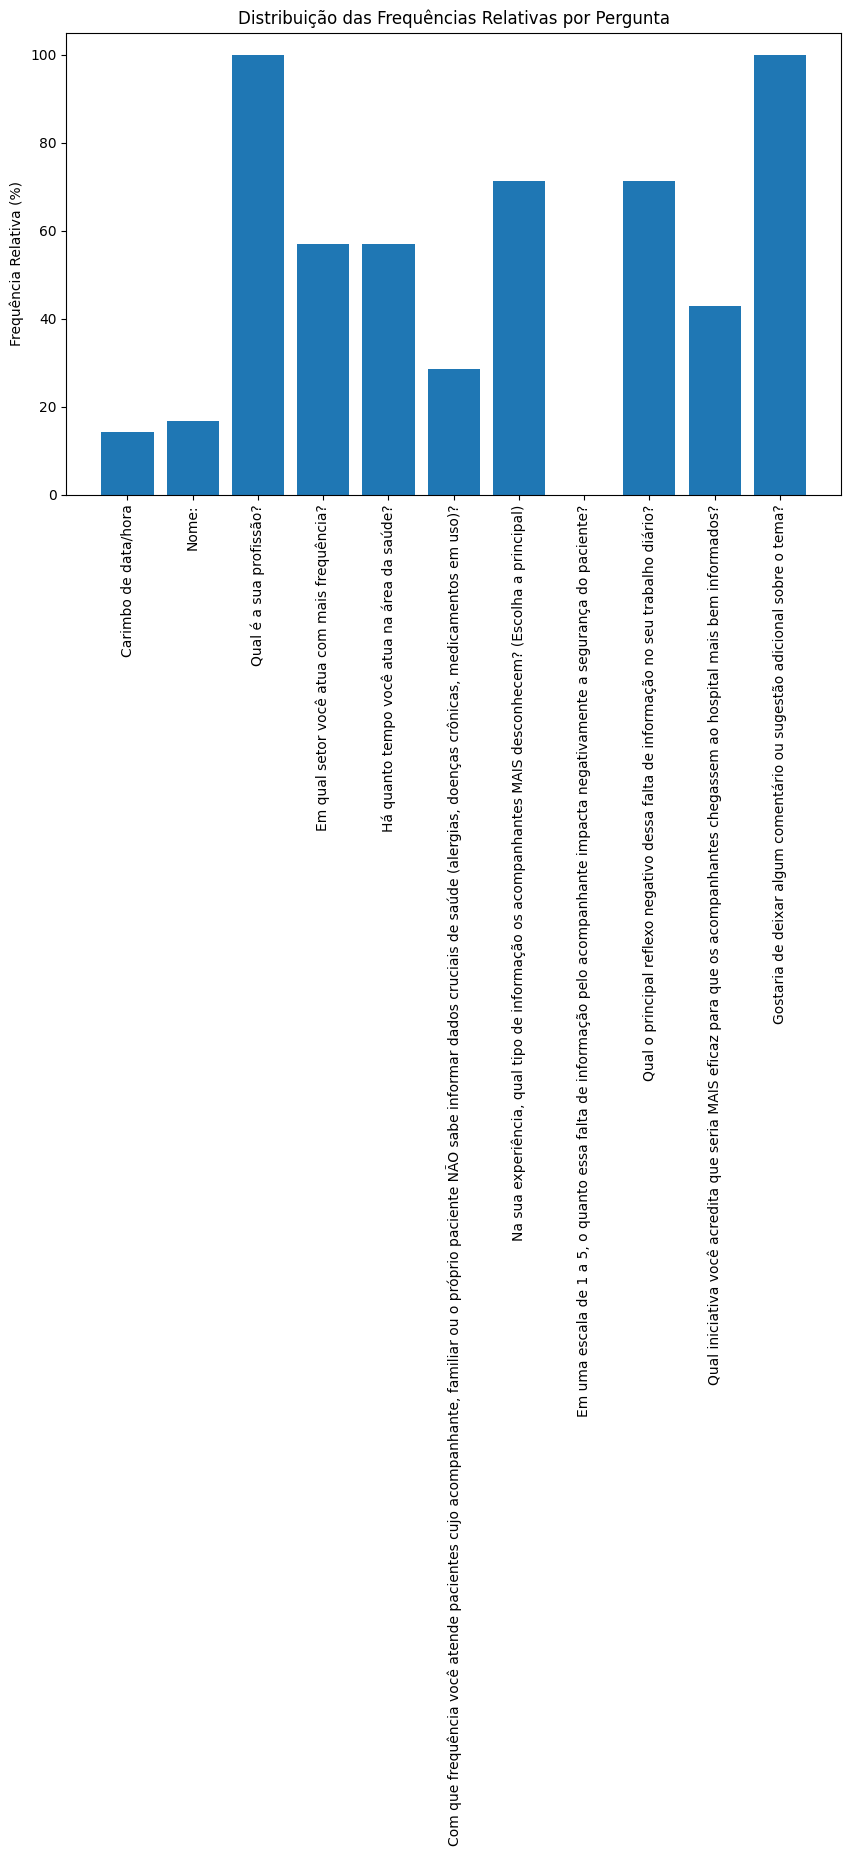

Pergunta com maior média:
Pergunta    Em uma escala de 1 a 5, o quanto essa falta de...
Média                                                4.571429
Name: 7, dtype: object

Pergunta com maior proporção 4-5:
Pergunta         Em uma escala de 1 a 5, o quanto essa falta de...
Proporção 4-5                                                100.0
Name: 7, dtype: object


In [3]:
# Outlines: Visualização dos principais indicadores estatísticos
import matplotlib.pyplot as plt

# Visualizar distribuição das frequências relativas
plt.figure(figsize=(10, 6))
plt.bar(df_resumo['Pergunta'], df_resumo['Freq_rel(%)'])
plt.xticks(rotation=90)
plt.ylabel('Frequência Relativa (%)')
plt.title('Distribuição das Frequências Relativas por Pergunta')
plt.tight_layout()
plt.show()

# Análises cruciais: identificar perguntas com maior impacto (exemplo: maior média ou proporção 4-5)
top_media = df_resumo.loc[df_resumo['Média'].idxmax()]
top_proporcao = df_resumo.loc[df_resumo['Proporção 4-5'].idxmax()]

print("Pergunta com maior média:")
print(top_media[['Pergunta', 'Média']])

print("\nPergunta com maior proporção 4-5:")
print(top_proporcao[['Pergunta', 'Proporção 4-5']])

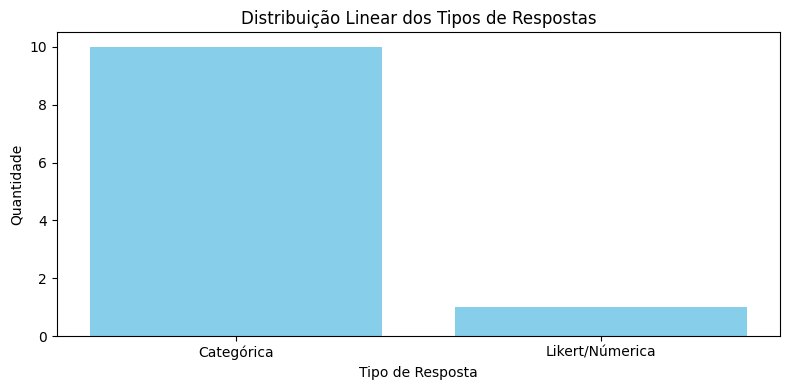

In [4]:
# Distribuição linear dos tipos de respostas
tipo_counts = df_resumo['Tipo'].value_counts()

plt.figure(figsize=(8, 4))
plt.bar(tipo_counts.index, tipo_counts.values, color='skyblue')
plt.xlabel('Tipo de Resposta')
plt.ylabel('Quantidade')
plt.title('Distribuição Linear dos Tipos de Respostas')
plt.tight_layout()
plt.show()

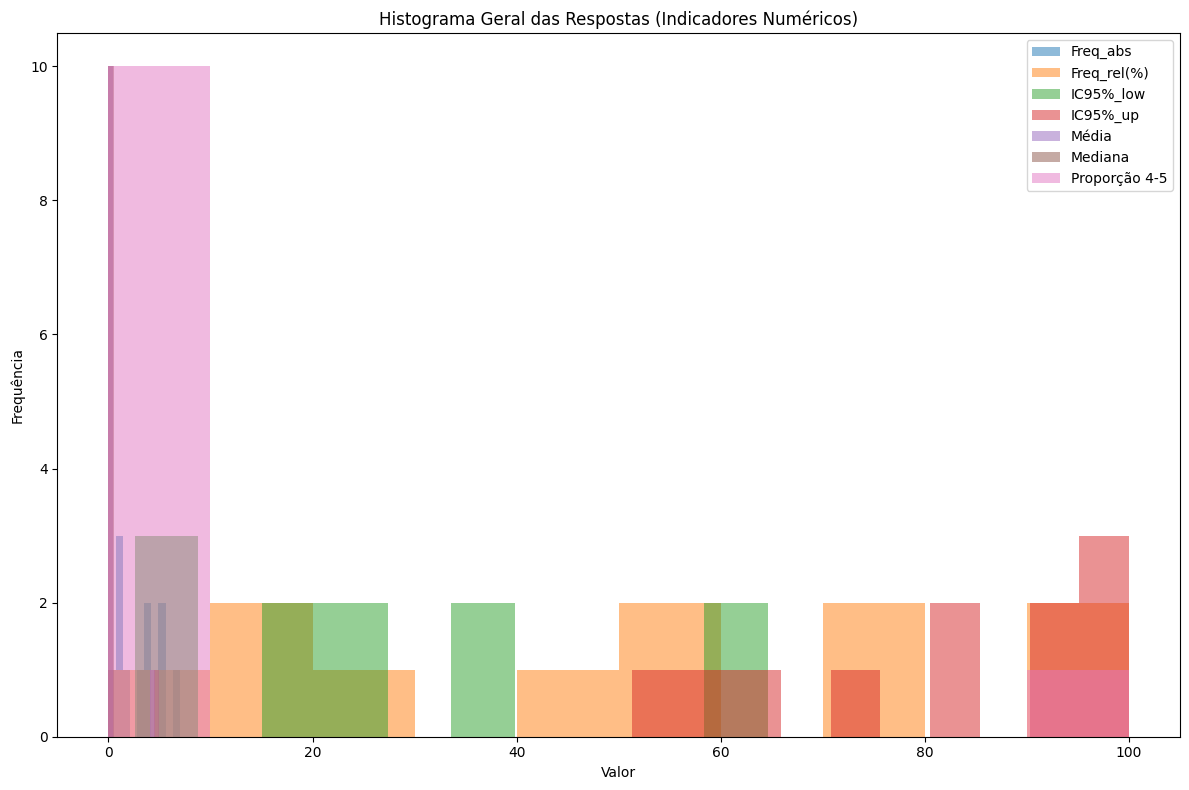


Resumo para 'Freq_abs':
  Média: 3.00
  Mediana: 3.00
  Mínimo: 0.00
  Máximo: 7.00
  Desvio padrão: 2.19

Resumo para 'Freq_rel(%)':
  Média: 50.86
  Mediana: 57.10
  Mínimo: 0.00
  Máximo: 100.00
  Desvio padrão: 33.76

Resumo para 'IC95%_low':
  Média: 27.39
  Mediana: 25.00
  Mínimo: 2.60
  Máximo: 64.60
  Desvio padrão: 21.64

Resumo para 'IC95%_up':
  Média: 81.71
  Mediana: 84.20
  Mínimo: 51.30
  Máximo: 100.00
  Desvio padrão: 17.72

Resumo para 'Média':
  Média: 0.42
  Mediana: 0.00
  Mínimo: 0.00
  Máximo: 4.57
  Desvio padrão: 1.38

Resumo para 'Mediana':
  Média: 0.45
  Mediana: 0.00
  Mínimo: 0.00
  Máximo: 5.00
  Desvio padrão: 1.51

Resumo para 'Proporção 4-5':
  Média: 9.09
  Mediana: 0.00
  Mínimo: 0.00
  Máximo: 100.00
  Desvio padrão: 30.15


In [5]:
# Histograma geral das respostas (considerando colunas numéricas relevantes)
plt.figure(figsize=(12, 8))
for col in num_cols:
    plt.hist(df_resumo[col], bins=10, alpha=0.5, label=col)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma Geral das Respostas (Indicadores Numéricos)')
plt.legend()
plt.tight_layout()
plt.show()

# Explicação das respostas
for col in num_cols:
    print(f"\nResumo para '{col}':")
    print(f"  Média: {df_resumo[col].mean():.2f}")
    print(f"  Mediana: {df_resumo[col].median():.2f}")
    print(f"  Mínimo: {df_resumo[col].min():.2f}")
    print(f"  Máximo: {df_resumo[col].max():.2f}")
    print(f"  Desvio padrão: {df_resumo[col].std():.2f}")

In [6]:
# Gerar um novo arquivo CSV com o resumo geral atualizado
df_resumo.to_csv('bancoDeDados/novo_resumo_geral.csv', index=False)
print("Arquivo 'novo_resumo_geral.csv' gerado com sucesso.")

Arquivo 'novo_resumo_geral.csv' gerado com sucesso.
